In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('Advertising.csv')

In [48]:
df.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [72]:
df=df.drop('Unnamed: 0',axis=1)

In [73]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


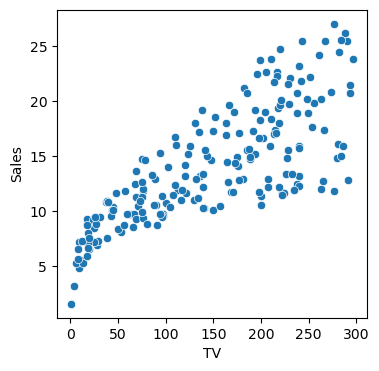

In [75]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

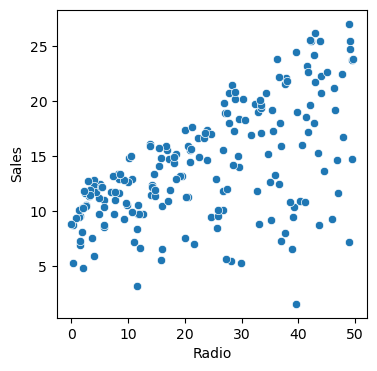

In [76]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

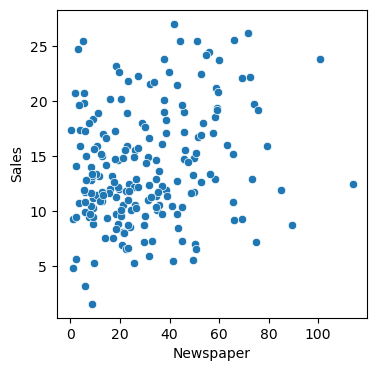

In [77]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [78]:
X=df.drop('Sales',axis=1)

In [79]:
y=df['Sales']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 6)

In [81]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [82]:
model.fit(X_train,y_train)

LinearRegression()

In [83]:
#predictions
y_pred=model.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 2.9106113713179593


In [85]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})

act_predict.head(10)

,Actual,Predict
0,15.9,15.817061
1,17.4,17.296187
2,10.1,9.816821
3,16.6,16.413236
4,10.3,9.814529
5,10.8,11.968507
6,22.2,21.514652
7,14.6,14.212551
8,12.9,13.502602
9,11.8,11.704514


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])

# Use the scaled data to fit the model and make predictions
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Sales'], test_size=0.3, random_state=6)
# create new data to predict on
new_data = [[85,14,21]] # TV = 100, Radio = 50, Newspaper = 25

# apply the same scaler used on the training data
new_data_scaled = scaler.transform(new_data)

# pass the preprocessed new data to the model for prediction
y_pred = model.predict(new_data_scaled)

print("Predicted Sales: ", y_pred)

Predicted Sales:  [2.78797902]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
